<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/KicapSambal/Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 7: Comparison between libraries**



*   Code below is using the **`Dask`** library






**TEAM MEMBERS:**
```
ZUHAYR ARIF BIN ZAKARIA (MCS231002)
MOHD NOR BIN MOHIDIN (MCS231008)
NABILA HUSNA BINTI ROSLI (MCS231009)
NUR AZIMAH BINTI MOHD SALLEH (MCS231011)
```

###**Pick a Big Dataset**

###**Dataset :** `Spotify Charts`


###**About**
This complete dataset is about all of the "Top 200" and "Viral 50" charts published globally by Spotify with a file size of 3.48 GB.

It has 26,173,514 observations and 9 columns, including title, rank, date, artist, url, region, chart, trend, and stream. This dataset contains the top 200 streamed tracks on Spotify every day from Jan 1 2017 to Dec 31 2021, collected by using Spotify API.


###**Loading the Dataset**

In [ ]:
# Install Kaggle Phyton Library
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dhruvildave/spotify-charts -f charts.csv

 99% 937M/945M [00:10<00:00, 102MB/s]
100% 945M/945M [00:10<00:00, 93.6MB/s]


In [ ]:
!unzip charts.csv.zip

Archive:  charts.csv.zip
  inflating: charts.csv              


## **Install Dask library**

In [ ]:
!pip install dask

## **Import libraries**

In [ ]:
import dask.dataframe as dd
import gc
import numpy as np
import pandas as pd
import warnings
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **1. Read Data**

In [ ]:
# Read CSV file into a DataFrame
%%time
df = dd.read_csv('charts.csv')

CPU times: user 10 ms, sys: 755 µs, total: 10.8 ms
Wall time: 18 ms


In [ ]:
%%time
df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


,title,rank,date,artist,url,region,chart,trend,streams
npartitions=54,,,,,,,,,
,object,int64,object,object,object,object,object,object,int64
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


##**2. Data Exploration**

Change the datatype of "streams" to be exact like what we used in Pandas. This also will allow for summary statistics can be done later

In [ ]:
dtype = {'streams': 'float64'}
assume_missing = True

if dtype:
    df = dd.read_csv('charts.csv', dtype=dtype)
elif assume_missing:
    df = dd.read_csv('charts.csv', assume_missing=True)
else:
    df = dd.read_csv('charts.csv')

In [ ]:
%%time

df.head()

CPU times: user 1.01 s, sys: 129 ms, total: 1.14 s
Wall time: 1.25 s


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [ ]:
%%time

df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, title to streams
dtypes: object(7), float64(1), int64(1)CPU times: user 1.44 ms, sys: 81 µs, total: 1.52 ms
Wall time: 3.24 ms


In [ ]:
%%time
description = df.describe().compute()
print(description)

               rank       streams
count  2.617351e+07  2.032190e+07
mean   8.092314e+01  5.526131e+04
std    5.918601e+01  2.095872e+05
min    1.000000e+00  1.001000e+03
25%    4.600000e+01  4.153500e+03
50%    9.600000e+01  1.045400e+04
75%    1.480000e+02  4.197200e+04
max    2.000000e+02  1.974970e+07
CPU times: user 50.8 s, sys: 4.98 s, total: 55.8 s
Wall time: 45.7 s


In [ ]:
%%time

row_count = df.shape[0].compute()
print(row_count)

26173514
CPU times: user 48 s, sys: 5 s, total: 53 s
Wall time: 35.7 s


In [ ]:
#Data Exploration For Column 'title'

%%time

unique_titles = df['title'].unique().compute()

CPU times: user 52.2 s, sys: 4.89 s, total: 57.1 s
Wall time: 39.1 s


In [ ]:
%%time

print("Unique values in the 'title' column:", unique_titles)

Unique values in the 'title' column: 0                            Chantaje (feat. Maluma)
1                        Vente Pa' Ca (feat. Maluma)
2                         Reggaetón Lento (Bailemos)
3                                             Safari
4                                        Shaky Shaky
                             ...                    
164802                                        めちゃくちゃ
164803                                Gris Atardecer
164804                             Imparfait inconnu
164805    Still Holy (feat. Ryan Ofei & Naomi Raine)
164806                                            怎叹
Name: title, Length: 164807, dtype: object
CPU times: user 2.24 ms, sys: 0 ns, total: 2.24 ms
Wall time: 2.24 ms


In [ ]:
#Data Exploration For Column 'artist'

%%time

unique_artist = df['artist'].unique().compute()

CPU times: user 51.7 s, sys: 4.89 s, total: 56.6 s
Wall time: 38.7 s


In [ ]:
%%time

print("Unique values in the 'artist' column:", unique_artist)

Unique values in the 'artist' column: 0                                      Shakira
1                                 Ricky Martin
2                                         CNCO
3        J Balvin, Pharrell Williams, BIA, Sky
4                                 Daddy Yankee
                         ...                  
96152                Bevok, Afrikaans Wil Dans
96153                                 vvpskvd.
96154                                      Adé
96155               Tribl, Maverick City Music
96156                             Yehuda Elias
Name: artist, Length: 96157, dtype: object
CPU times: user 1.06 ms, sys: 6 µs, total: 1.06 ms
Wall time: 1.05 ms


In [ ]:
#Data Exploration For Column 'region'

%%time

unique_region = df['region'].unique().compute()

CPU times: user 49.9 s, sys: 4.9 s, total: 54.7 s
Wall time: 37.1 s


In [ ]:
%%time

print("Unique values in the 'region' column:", unique_region)

Unique values in the 'region' column: 0                Argentina
1                Australia
2                   Brazil
3                  Austria
4                  Belgium
              ...         
65            South Africa
66    United Arab Emirates
67                  Russia
68                 Ukraine
69             South Korea
Name: region, Length: 70, dtype: object
CPU times: user 1.04 ms, sys: 5 µs, total: 1.05 ms
Wall time: 1.02 ms


Change the datatype of date from object to datetime64 so that we can extract the year

In [ ]:
%%time

df['date'] = df['date'].map_partitions(pd.to_datetime, meta=('date', 'datetime64[ns]'))

CPU times: user 14 ms, sys: 1.16 ms, total: 15.2 ms
Wall time: 19.2 ms


In [ ]:
%%time

df['year'] = df['date'].dt.year

CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 23.7 ms


In [ ]:
%%time

songs_per_year = df.groupby('year')['title'].count().compute()
print(songs_per_year)

year
2017    4401145
2018    4863016
2019    5412658
2020    5793148
2021    5703536
Name: title, dtype: int64
CPU times: user 3.69 s, sys: 457 ms, total: 4.15 s
Wall time: 1min 6s


##**3. EDA Visualization**

### **Top 5 artists**

In [ ]:
# Top 5 artists

%%time

counts = df['artist'].value_counts()
counts.head()

CPU times: user 51.9 s, sys: 4.95 s, total: 56.8 s
Wall time: 39.8 s


Ed Sheeran       387917
Billie Eilish    251825
Post Malone      211272
Bad Bunny        203403
Ariana Grande    189914
Name: artist, dtype: int64

###**Bottom 5 artists**

In [ ]:
# Bottom 5 artists

%%time

counts = df['artist'].value_counts()
counts.tail()

CPU times: user 51.8 s, sys: 4.61 s, total: 56.4 s
Wall time: 39.3 s


Hindia, Natasha Udu, Kamga    1
Hinap                         1
Himmel                        1
Himeko                        1
Ｍ, 兩千 2ØØØ, RedcolorG         1
Name: artist, dtype: int64

###**Distribution of Streams Among Regions**

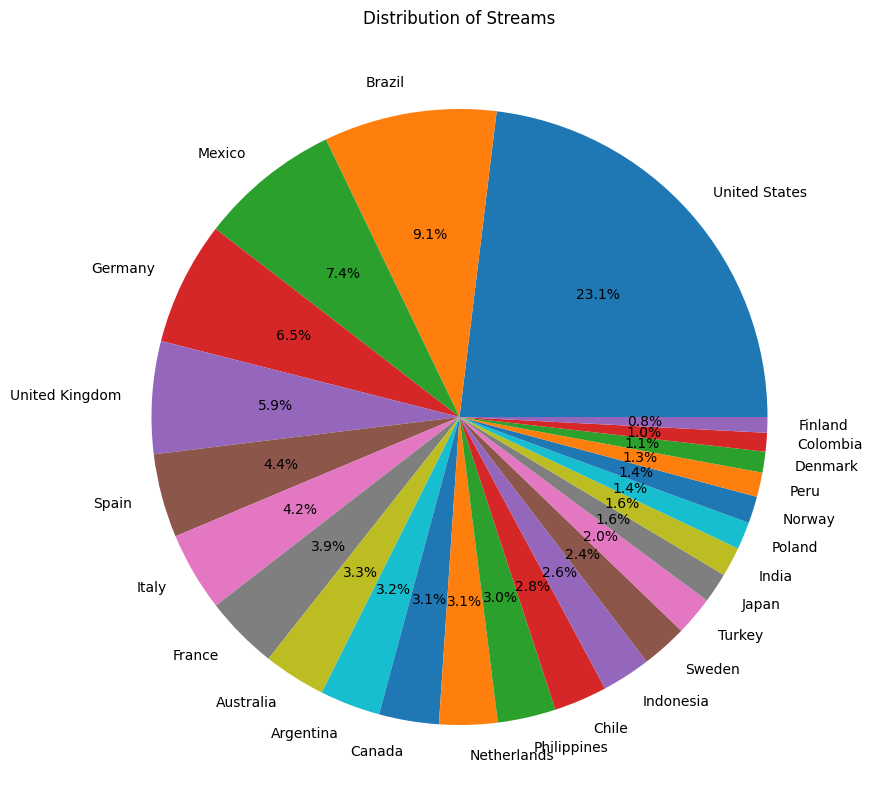

CPU times: user 3.16 s, sys: 383 ms, total: 3.54 s
Wall time: 55.1 s


In [ ]:
%%time

global_200 = df[df['chart'] == 'top200']

# Group by 'region' and sum the 'streams' column
streams_grouped = global_200.groupby('region')['streams'].sum().compute().reset_index()

# Convert streams to billions for better readability
streams_grouped['streams'] /= 1e9

# Exclude 'Global' from the pie chart
streams_grouped = streams_grouped[streams_grouped['region'] != 'Global']

# Select the top 25
streams_grouped = streams_grouped.nlargest(25, 'streams')

# Plot the pie chart using Matplotlib
plt.figure(figsize=(10, 10))
plt.pie(streams_grouped['streams'], labels=streams_grouped['region'], autopct='%.1f%%')
plt.title('Distribution of Streams')
plt.show()

###**Artist had Most Total Streams in US**

In [ ]:
#Artist that have most total streams

%%time

top_200_pop = df[(df['chart'] == 'top200') & (df['region'] == 'United States')]

# Select relevant columns
artists_streams = top_200_pop[['artist', 'streams']]

# Convert to Pandas DataFrame (if necessary for the operation)
artists_streams = artists_streams.compute()

artists, counts = np.unique(artists_streams['artist'], return_counts=True)
all_streams = []
keep_track = []

for a in artists:
    result = artists_streams.loc[artists_streams['artist'] == a, 'streams'].sum()
    keep_track.append(a)
    all_streams.append(result)

dict_top_streams = {keep_track[i]: all_streams[i] for i in range(len(all_streams))}

all_streams_sort = sorted(dict_top_streams.items(), key=lambda x: x[1], reverse=True)

sorted_top_streams = pd.DataFrame(all_streams_sort).head(5)
sorted_top_streams.loc[:, 1] = sorted_top_streams.loc[:, 1] / 1000000

sorted_top_streams = sorted_top_streams.rename(columns={0: 'Artist', 1: 'Streams (millions)'})
sorted_top_streams

CPU times: user 1min 52s, sys: 5.17 s, total: 1min 57s
Wall time: 1min 40s


,Artist,Streams (millions)
0,Post Malone,4966.682478
1,Drake,4697.961521
2,Juice WRLD,4400.300033
3,XXXTENTACION,3436.491646
4,Billie Eilish,2892.423843


###**Top 50 Stream List For Each Day**

In [ ]:
# Top 50 list for each day

%%time

top50 = df[(df['chart'] == 'top200') & (df['rank'] <= 50)]  # get the top50
top50 = top50.drop(columns='chart')  # drop the 'chart' column
top50 = top50.compute()
top50

CPU times: user 53.1 s, sys: 8 s, total: 1min 1s
Wall time: 42.9 s


,title,rank,date,artist,url,region,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...
101443,Explícale (feat. Bad Bunny),46,2018-01-31,Yandel,https://open.spotify.com/track/1LszjjoVwDDZcWU...,Uruguay,MOVE_DOWN,4560.0
101444,Nena Maldicion (feat. Lenny Tavarez),47,2018-01-31,"Paulo Londra, Lenny Tavárez",https://open.spotify.com/track/3TnhQSRwT3AVMdX...,Uruguay,MOVE_UP,4406.0
101445,Ahora Dice,48,2018-01-31,"Chris Jedi, J Balvin, Ozuna, Arcangel",https://open.spotify.com/track/22eADXu8DfOAUED...,Uruguay,SAME_POSITION,4316.0
101446,La fórmula (feat. Chris Jedi),49,2018-01-31,"De La Ghetto, Daddy Yankee, Ozuna",https://open.spotify.com/track/4XCQtUoRSh22Ep1...,Uruguay,SAME_POSITION,4272.0


###**Visualization of Top 50 Artist Popularity**

In [ ]:
#Install wordcloud to visualized Top50 Artist popularity
!pip install wordcloud

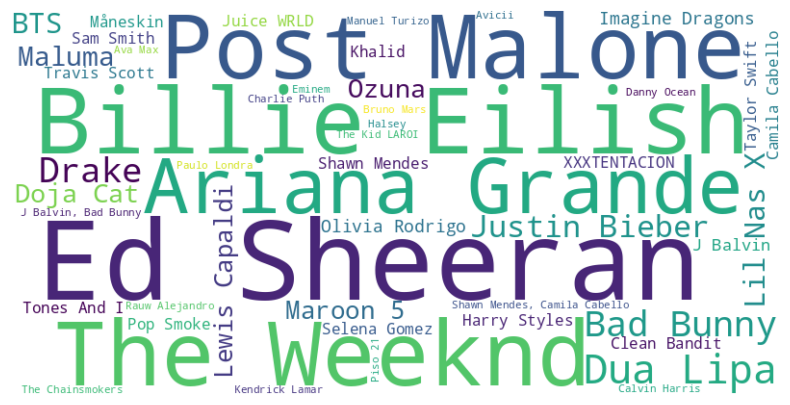

CPU times: user 54.1 s, sys: 5.57 s, total: 59.7 s
Wall time: 50.5 s


In [ ]:
#Visualization of artist popularity

%%time

from wordcloud import WordCloud

# Assuming 'df' is a Dask DataFrame
top50 = df[(df['chart'] == 'top200') & (df['rank'] <= 50)]

# Compute the Dask DataFrame to get a Pandas DataFrame
top50_pd = top50.compute()

# Get the counts of each artist using Pandas DataFrame
counts = top50_pd['artist'].value_counts()

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(counts.to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**Top 10 Artist Ranking by Total Streams in All Regions**

In [ ]:
## Calculate the top 10 artist ranking by total streams in all regions

%%time

# Group by both 'artist' and 'region', aggregate sum of streams
artist_ranking = df.groupby(['artist', 'region'])['streams'].sum().reset_index()

# Calculate total streams for each artist across all regions
artist_total_streams = artist_ranking.groupby('artist')['streams'].sum().reset_index()

# Select top 10 artists based on overall stream count
top_10_overall_artists = artist_total_streams.nlargest(10, 'streams').compute()

# Display top 10 overall artists
print("Top 10 Overall Artists:")
print(top_10_overall_artists[['artist', 'streams']])

Top 10 Overall Artists:
               artist       streams
23921      Ed Sheeran  2.359566e+10
67599     Post Malone  1.945275e+10
22824           Drake  1.818064e+10
10203   Billie Eilish  1.719380e+10
6152    Ariana Grande  1.537585e+10
23033        Dua Lipa  1.214711e+10
41204      Juice WRLD  1.213308e+10
89322    XXXTENTACION  1.207190e+10
83159      The Weeknd  1.204280e+10
63785  Olivia Rodrigo  9.517652e+09
CPU times: user 1min, sys: 2.23 s, total: 1min 2s
Wall time: 51.5 s


In [ ]:
x = artist_ranking['artist'].map(lambda val: str(val), meta=('artist', 'str')).compute()

In [ ]:

y = artist_ranking['streams'].map(lambda x: int(x), meta=('streams', 'int'))

# Compute the result
y_list = y.compute().tolist()

In [ ]:
# Creating a Dask DataFrame from the data
artist_rank = pd.DataFrame({"artist": x, "streams": y})

# Convert 'streams' column to numeric type
artist_rank['streams'] = pd.to_numeric(artist_rank['streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column
artist_rank = artist_rank.dropna(subset=['streams'])

# Creating a Dask DataFrame from the Pandas DataFrame
artist_rank_dask = dd.from_pandas(artist_rank, npartitions=1)  # Adjust npartitions as needed

# Fetching the top 10 artists based on stream count
top_artist = artist_rank_dask.nlargest(10, 'streams').compute()
print(top_artist)

              artist      streams
10510     Ed Sheeran  13078224434
28753    Post Malone  10114406527
4636   Billie Eilish   9666022728
9948           Drake   9314051532
2593   Ariana Grande   8359848998
38390   XXXTENTACION   6572687838
10207       Dua Lipa   6541810818
35856     The Weeknd   6292716534
17387     Juice WRLD   5769814287
36827   Travis Scott   5071442728


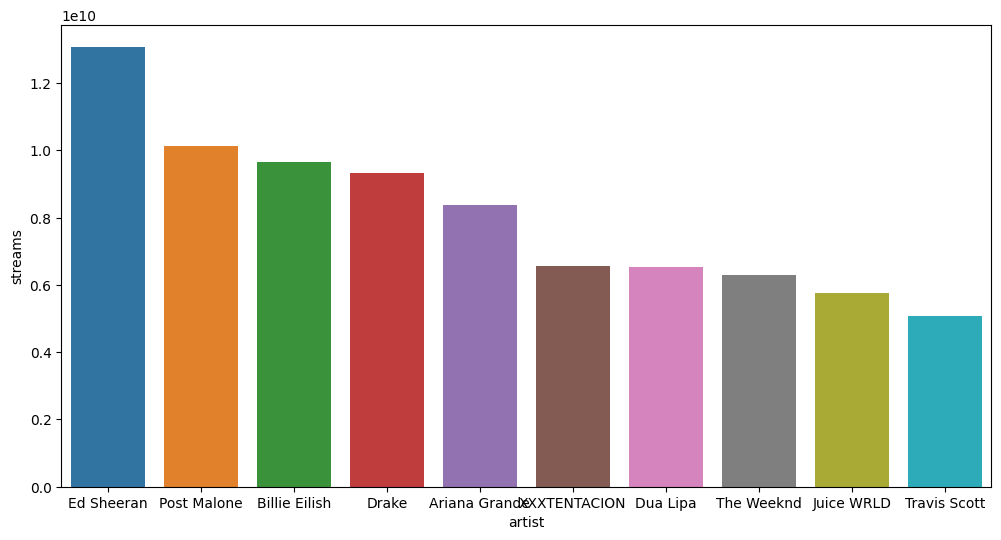

CPU times: user 208 ms, sys: 90.8 ms, total: 299 ms
Wall time: 196 ms


In [ ]:
%%time
plt.figure(figsize=(12, 6))
# sns.barplot(x='streams_sum',y='artist',data=(artist_ranking))
sns.barplot(x=top_artist.artist,y=top_artist.streams,data=(top_artist))
plt.show()

###**Total Song Released for Each Year**

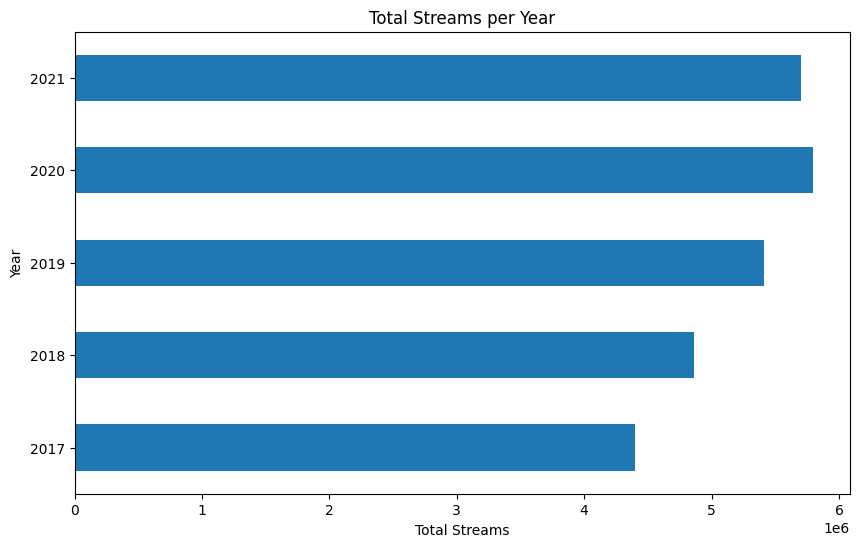

In [ ]:
plt.figure(figsize=(10, 6))
songs_per_year.plot(kind='barh')
plt.xlabel('Total Streams')
plt.ylabel('Year')
plt.title('Total Streams per Year')
plt.show()